<a href="https://colab.research.google.com/github/dphi-official/Data_Science_Bootcamp/blob/master/Week3/Linear_Regression/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression (Optional)

**Machine learning** is a method used to iteratively learn from data without being explicitly programmed by humans. It is very useful when we want to find a pattern that lies within a large dataset.

There are two types of machine learning problem, which are the **Regression** and **Classification** problem. In short, regression problem returns a value (example: the extimated price of a house), while classfication problem returns a category (exmaple: cat or dog).

In this notebook, we will focus on **Linear Regression** using a library called `ScikitLearn`.

This notebook is divided into 2 parts:
1. Linear regression for a simple `y = mx + c` problem.
2. Linear regression for polynomial.

## Section 1: Linear Regression for y = mx + c

In [ ]:
# libraries for random number
from random import seed
from random import random

# libraries for numerical
import pandas as pd  
import numpy as np 
import operator

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

# to plot the diagrams within the cells
%matplotlib inline

In the first part, we will examine a simple linear problem.
In general, a linear equation can be expressed by:
$$y = mx + c$$

In the first part, we will create a model that can find out the coefficient `m` and intercept `c`.
We will use the equation: $$y = 2x + 1$$ for this section.

To add some complexity, let's create some noise to the function.

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
noise = np.random.uniform(-1, 1, 10)
y = np.array(2 * x + 1 + noise)
print("x: ", x)
print("y: ", y)

x:  [ 1  2  3  4  5  6  7  8  9 10]
y:  [ 3.23648193  4.88700386  6.15978393  9.84232031 10.85925204 13.17421082
 15.79633765 16.85860429 18.75339959 20.29392718]


In [ ]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,1,3.236482
1,2,4.887004
2,3,6.159784
3,4,9.842320
4,5,10.859252
5,6,13.174211
6,7,15.796338
7,8,16.858604
8,9,18.753400
9,10,20.293927


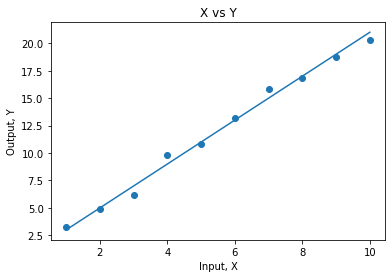

In [ ]:
plt.scatter(x, y)
plt.plot(x, 2 * x + 1)
plt.title('X vs Y')
plt.xlabel('Input, X')
plt.ylabel('Output, Y')
plt.show()

Now, we want to create a model that can map the input to the output. `ScikitLearn` library provide us the simplicity to do it by using `LinearRegression()`. The `.fit` function maps the input to the output and find the coefficient and intercept. Do note that we need to reshape the input. The (-1, 1) tells Python that we want the shape to be 1 column, the `-1` is asking the python to figure out what to put in it. In our case, we want to reshape a (1, 10) to (10, 1), so the -1 will be replaced by 10.

In [ ]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
print(x.reshape(-1, 1).shape)

(10, 1)


We can obtain the coefficient `m` by using the `.coef_` property.

In [ ]:
print(model.coef_)

[[1.96516903]]


We can obtain the intercept `c` by using the `.intercept_` property.

In [ ]:
print(model.intercept_)

[1.17770249]


Now let's use some data that the model never seen before to test our model. The `.predict()` method will allow us to predict the output using the model that we built just now.

In [ ]:
x_test = np.array([11, 12, 13, 14, 15])
y_test = np.array([23, 25, 27, 29, 31])
y_pred = model.predict(x_test.reshape(-1, 1))
print(y_pred)

[[22.79456183]
 [24.75973086]
 [26.72489989]
 [28.69006892]
 [30.65523795]]


The results are not as accurate as the expected result (y_test). This means there is an error. We can calculate the error by three method:
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)

Thankfully, `ScikitLearn` library provide us the built-in function to do that, which we have imported in the import section.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.275100111723426
Mean Squared Error: 0.07810646434751681
Root Mean Squared Error: 0.27947533763736077


Now let us visualize the predicted output and the actual output.

Text(0.5, 1.0, 'Actual Y vs Predicted Y')

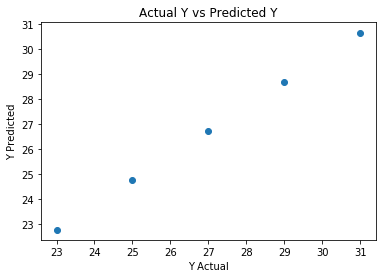

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y Actual")
plt.ylabel("Y Predicted")
plt.title("Actual Y vs Predicted Y")

## Section 2: Polynomial Problem
A polynomial can be expressed generally by:
$$y = m_nx^n + m_{n-1}x^{n-1} + + m_{n-2}x^{n-2} + ... + m_{2}x^{2} + m_1x + c$$
Similar to the previous section, we have coefficient of $$m_n, m_{n-1}, ..., m_1$$ and an intercept `c`.

In this section, we will use the function: $$y = 0.5x^3-2x^2 + x $$

This time, we will also randomize the x so that the data can be generated randomly.

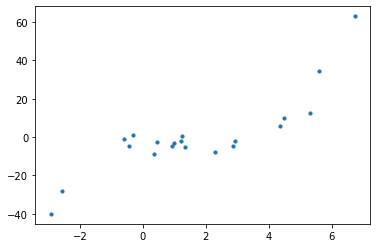

In [ ]:
np.random.seed(0)
x2 = 3 * np.random.normal(0, 1, 20)
y2 = 0.5 * (x2 ** 3) - 2 * (x2 ** 2) + x2 + np.random.normal(-3, 3, 20)
plt.scatter(x2, y2, s = 10) # s = 10 makes the market smaller
plt.show()

We would like to create a model that can run for different degree. So we define a funtion that create a model by taking a parameter `degree`. In this piece of code, you will see that the x and y function are redefined. This is because the data type of x will change when we sort the x values before plotting.

In [ ]:
def polynomial_model(degree):
    np.random.seed(0)
    x2 = 3 * np.random.normal(0, 1, 20)
    y2 = x2 - 2 * (x2 ** 2) + 0.5 * (x2 ** 3) + np.random.normal(-3, 3, 20)
    x2 = x2[:, np.newaxis]
    y2 = y2[:, np.newaxis]
    polynomial_features= PolynomialFeatures(degree = degree)
    x_poly = polynomial_features.fit_transform(x2)
    model = LinearRegression()
    model.fit(x_poly, y2)
    y_poly_pred = model.predict(x_poly)
    
    # Finding the RMSE and R2 score
    rmse = np.sqrt(mean_squared_error(y2,y_poly_pred))
    r2 = r2_score(y2,y_poly_pred)
    print("RMSE: ", rmse)
    print("R2: ", r2)
    
    plt.figure(figsize = (8, 6))
    plt.scatter(x2, y2, s = 10)
    
    # Sort the values of x before line plot
    sorted_zip = sorted(zip(x2, y_poly_pred))
    x2, y_poly_pred = zip(*sorted_zip) # Zip(*) means unpack a zip, make every argument a single element
    plt.plot(x2, y_poly_pred, color='m')
    plt.show()
    
    return (rmse, r2, np.asarray(y_poly_pred))

If you wonder what the `[:, n.newaxis]` does:

![title](https://i.stack.imgur.com/zkMBy.png)

RMSE:  10.810057845605048
R2:  0.7114299715230077


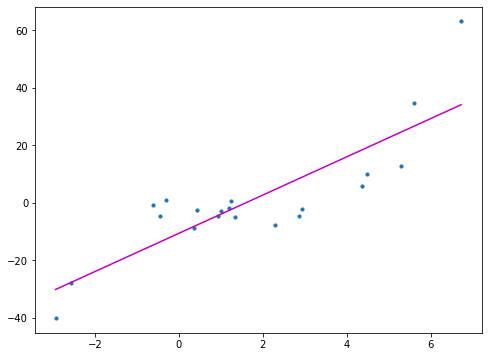

In [ ]:
rmse_return, r2_return, y_poly_pred_return = polynomial_model(1)

# Creating array and list to store the data for each degree
rmse = np.array([1.0, 2.0, 3.0, 15.0])
r2 = np.array([1.0, 2.0, 3.0, 15.0])
y_poly_pred = []

# Append the data into the array and list
rmse[0] = rmse_return
r2[0] = r2_return
y_poly_pred.append(y_poly_pred_return)

RMSE:  10.360813483914935
R2:  0.7349163769925623


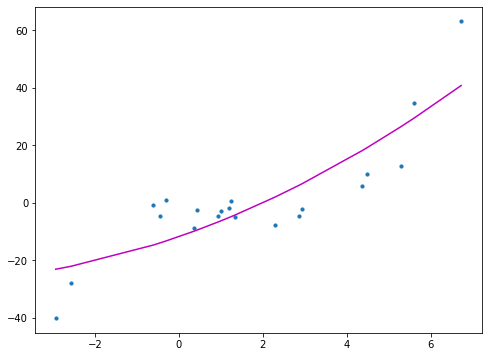

In [ ]:
rmse_return, r2_return, y_poly_pred_return = polynomial_model(2)

rmse[1] = rmse_return
r2[1] = r2_return
y_poly_pred.append(y_poly_pred_return)

RMSE:  3.4498955074087267
R2:  0.9706094936257561


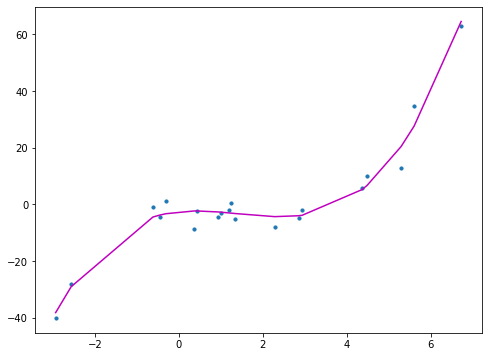

In [ ]:
rmse_return, r2_return, y_poly_pred_return = polynomial_model(3)

rmse[2] = rmse_return
r2[2] = r2_return
y_poly_pred.append(y_poly_pred_return)

RMSE:  1.433940164595766
R2:  0.9949224144957173


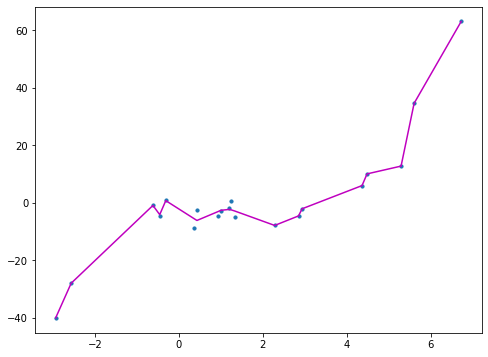

In [ ]:
rmse_return, r2_return, y_poly_pred_return = polynomial_model(15)

rmse[3] = rmse_return
r2[3] = r2_return
y_poly_pred.append(y_poly_pred_return)
y_poly_pred = np.asarray(y_poly_pred)

We can see that the R2 score is getting higher and higher! And eventually, the R2 score is 0.99 for degree of 15! **However, this is not the best model!** When the degree goes to 15, the model starts to consider the noise. This means taht the model has started to "memorize" each data instead of getting a general pattern of the data. This scenario is when we called a *overfitting*. We want the model to learn the general pattern but not got into deep about all of the noise. Therefore, the most appropriate degree to use in this case is 3, which is same as our predefined polynomial!

After we examine the result of different degree, we can plot the chart together. We can remove the degree = 15 since we know that it is overfitted.

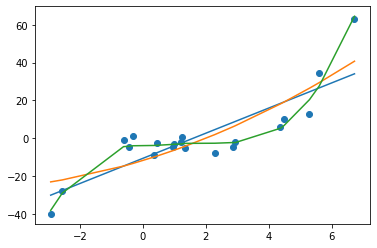

In [ ]:
np.random.seed(0)
x2 = 3 * np.random.normal(0, 1, 20)
y2 = x2 - 2 * (x2 ** 2) + 0.5 * (x2 ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x2, y2)
plt.plot(sorted(x2), sorted(y_poly_pred[0]))
plt.plot(sorted(x2), sorted(y_poly_pred[1]))
plt.plot(sorted(x2), sorted(y_poly_pred[2]))
plt.show()

Now lets plot the R2 vs degree chart.

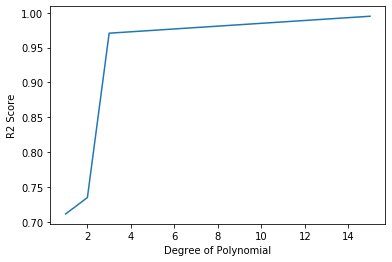

In [ ]:
plt.plot(np.array([1, 2, 3, 15]), r2)
plt.xlabel("Degree of Polynomial")
plt.ylabel("R2 Score")
plt.show()

# Conclusion
We have covered from a simple `y = mx + c` linear regression to polynomial linear regression! This sums up the topic of polynomial regression. To learn more about ScikitLearn, you can visit the [ScikitLearn Official Documentation](https://scikit-learn.org/stable/).

# Things to Remember
Data Science is not all about Python and all the fantastic libraries. It is about how you gain valueable insights or knowledge from the data to assist you or your organization in making better decision! Python is just one of the tools to achieve that!

# What's Next
Now, you have seen how to perform machine learning using `ScikitLearn`. Next, you can try to apply what you learn on different datasets! Here are some awesome [datasets](https://scikit-learn.org/stable/datasets/index.html) you can use to try it out! 

This dataset are from `ScikitLearn` itself, do try it out for the boston and diabetes dataset!

Also, you can explore more tools and libraries like PyTorch and TensorFlow in the future! But that is another whole new story!

Good luck and all the best!